<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/47.1_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a dataset with potentially correlated variables into a set of linearly uncorrelated variables called principal components.

**Benefits of PCA:**

*   **Dimensionality Reduction:** Reduces the number of variables, making the data easier to visualize and analyze.
*   **Noise Reduction:** By keeping only the principal components that capture the most variance, PCA can help to filter out noise in the data.
*   **Improved Performance:** Reduced dimensionality can lead to faster training times and potentially improved performance for machine learning algorithms.
*   **Feature Extraction:** The principal components can be considered as new features that capture the most important information in the original data.

**Geometric Intuition of PCA:**

Imagine your data points in a multi-dimensional space. PCA finds a new set of axes (principal components) that are oriented in a way that captures the most variance in the data. The first principal component is the direction along which the data varies the most. The second principal component is orthogonal to the first and captures the next largest amount of variance, and so on. PCA essentially projects the data onto these new axes, effectively rotating and potentially compressing the data while preserving as much of the original variability as possible.

**Variance and its Importance in PCA:**

**Variance** measures the spread or dispersion of data points along a particular direction. In the context of PCA, variance is crucial because the principal components are determined by maximizing the variance of the projected data.

*   **Importance of Variance:** PCA prioritizes directions with high variance because these directions contain the most information about the structure and variability of the data. Directions with low variance indicate that the data points are clustered closely together in that dimension, providing less distinguishing information. By selecting principal components with high variance, PCA retains the dimensions that best represent the underlying patterns and relationships in the data while discarding dimensions that contribute little to the overall spread.

**Why Variance Fails to Explain the Relationship Between Variables (x and y):**

While variance is excellent for understanding the spread of a single variable, it doesn't tell us anything about how two variables relate to each other. For example, if you have two variables, `x` and `y`, knowing the variance of `x` and the variance of `y` doesn't tell you if `x` increases when `y` increases (a positive relationship), or if `x` decreases when `y` increases (a negative relationship), or if there's no clear linear relationship at all. Variance only describes the spread along each individual axis.

**Introducing Covariance:**

To understand the linear relationship between two variables, we use **covariance**. Covariance measures the extent to which two variables change together.

*   **Positive Covariance:** Indicates that as one variable increases, the other tends to increase as well.
*   **Negative Covariance:** Indicates that as one variable increases, the other tends to decrease.
*   **Covariance near Zero:** Indicates little to no linear relationship between the two variables.

**The Covariance Matrix:**

When dealing with multiple variables, we use a **covariance matrix** to summarize the covariances between all pairs of variables. For a dataset with `n` variables, the covariance matrix is an `n x n` symmetric matrix where:

*   The diagonal elements represent the variance of each individual variable.
*   The off-diagonal elements represent the covariance between two different variables.

The covariance matrix is a fundamental tool in PCA because it captures the relationships (variances and covariances) between all pairs of variables in the dataset. PCA uses this matrix to find the directions (principal components) that maximize the variance of the projected data, taking into account the correlations between variables.

In [2]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

In [3]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [4]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [5]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [6]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [7]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print('Eigen Vectors:\n', eigen_vectors)
print('\nEigen Values:\n', eigen_values)

Eigen Vectors:
 [[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]

Eigen Values:
 [1.3536065  0.94557084 0.77774573]


Populating the interactive namespace from numpy and matplotlib


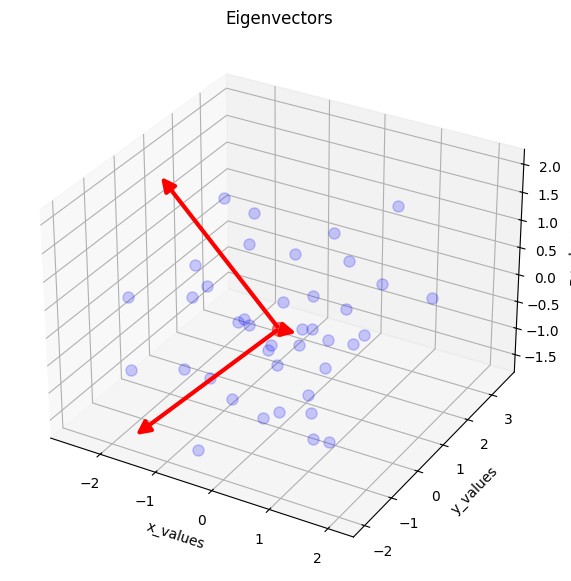

In [12]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        from mpl_toolkits.mplot3d import proj3d
        xs3d, ys3d, zs3d = self._verts3d
        # Use self.axes.M to get the projection matrix
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
        from mpl_toolkits.mplot3d import proj3d
        xs3d, ys3d, zs3d = self._verts3d
        # Use self.axes.M to get the projection matrix
        return np.min(proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)[2])


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    # Scale the eigenvector for better visualization
    v_scaled = v * 3 # Adjust the scaling factor as needed
    a = Arrow3D([df['feature1'].mean(), df['feature1'].mean() + v_scaled[0]],
                [df['feature2'].mean(), df['feature2'].mean() + v_scaled[1]],
                [df['feature3'].mean(), df['feature3'].mean() + v_scaled[2]],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [13]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [14]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [15]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()